In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
## Data Preprocessing

In [5]:
data.shape

(7920, 3)

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [13]:
## ID and Lable 0 Noice

In [12]:
## Text Preprocessing

In [14]:
import re
import string

In [16]:
## Convert Uppercase to Lowercase

In [17]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [18]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [19]:
## Removing all Links

In [20]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [21]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [22]:
## Remove punctuations

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [25]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [26]:
## Remove Numbers

In [27]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

In [28]:
data["tweet"].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [29]:
## Remove Stopwords

In [30]:
import nltk

ModuleNotFoundError: No module named 'nltk'

In [31]:
!pip install nltk

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     - -------------------------------------- 0.1/1.5 MB 550.5 kB/s eta 0:00:03
     - -------------------------------------- 0.1/1.5 MB 491.5 kB/s eta 0:00:03
     - -------------------------------------- 0.1/1.5 MB 491.5 kB/s eta 0:00:03
     -- ------------------------------------- 0.1/1.5 MB 403.5 kB/s eta 0:00:04
     ---- ----------------------------------- 0.2/1.5 MB 583.1 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.5 MB 657.3 kB/s eta 0:00:02
     ----- ---------------------------------- 0.2/1.5 MB 599.0 kB/s eta 0:00:03
     -------- ------------------------------- 0.3/1.5 MB 705.4 kB/s eta 0:00:02
     -------- ------------------------------- 0.3/1.5 MB 723.4 kB/s eta 0:00:02
     ---------- ----------------------------- 0.4/1.5 MB 778.2 kB/s eta 0:00:02
     ----------- ---------------------------- 0.5/1.5 MB 8

In [32]:
import nltk

In [33]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [34]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [35]:
sw


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [37]:
data["tweet"].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [38]:
## Stemming

In [39]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [40]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [41]:
data["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [42]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [43]:
## Building Vacabulary

In [50]:
from collections import Counter
vocab = Counter()

In [45]:
vocab

Counter()

In [ ]:
vocab.update(['java','python','python', 'c++'])

In [51]:
vocab

Counter()

In [52]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [54]:
len(vocab)

15949

In [55]:
data.shape

(7920, 3)

In [56]:
## over fitting a model

In [57]:
tokens = [key for key in vocab if vocab[key] > 10]

In [58]:
len(tokens)

1145

In [59]:
## shape :)

In [60]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [61]:
## Divide dataset

In [62]:
X = data['tweet']
y = data['label']

In [66]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [67]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.4 kB 1.3 MB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 525.1 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 321.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 1.4 MB/s eta 0:00:07
   ---------------------------------------- 0.1/9.2 MB 1.1 MB/s eta 0:00:09
   ---------------------------------------- 0.1/9.2 MB 751.6 kB/s eta 0:00:13
    --------------------------------------- 0.1/9.2 MB 804.6 kB/s eta 0:00:12
    --------------------------------------- 0.2/9.2 MB 756.6 kB/s eta 0:00:12
    --------------------------------------- 0.2/9.2 MB 737.3 kB/s eta 0:00:13
    --------------------------------------- 0.2/9.2 MB 724.0 kB/s eta 0:00:

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [69]:
X_train.shape

(6336,)

In [71]:
X_test.shape

(1584,)

In [72]:
X_test

4389    contact got delet fuck appl appl stepclosertog...
2154               never softwar updat phone im feel left
1515    idiot award bn appl patent doubl tap zoom boun...
5628    photo new year samdaniel paper artist samsung ...
2340    bday month loud start decemb newphon samsung g...
                              ...                        
1210    doodl cl ceenge doodl cl chemistri dead tree h...
3228    appl io updatesy suck wipe data devic number a...
3361    thank u michaelkor new baglit im happi michael...
7383    timcook sinc appl isnt twitter id like say per...
3008    timcook slap ceo blackberri audac campaign app...
Name: tweet, Length: 1584, dtype: object

In [73]:
## Vectorization

In [74]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [75]:
vectorized_x_train = vectorizer(X_train, tokens)

In [76]:
vectorized_x_test = vectorizer(X_test, tokens)

In [77]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [78]:
y_train

5561    0
3492    1
390     0
7371    0
4569    0
       ..
4072    1
2218    0
3385    0
3828    0
2273    0
Name: label, Length: 6336, dtype: int64

In [79]:
y_train.value_counts()

label
0    4717
1    1619
Name: count, dtype: int64

In [80]:
## this one is imbalance dataset

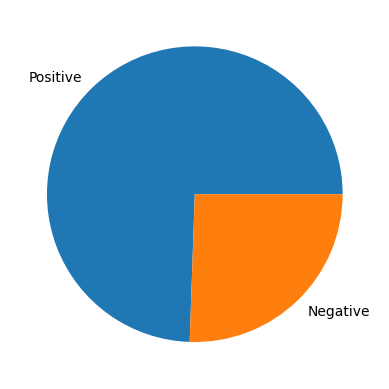

In [81]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [82]:
## Handle imbalanced dataset

In [83]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ------ -------------------------------- 41.0/235.6 kB 653.6 kB/s eta 0:00:01
   --------------- ----------------------- 92.2/235.6 kB 871.5 kB/s eta 0:00:01
   ----------------------- -------------- 143.4/235.6 kB 950.9 kB/s eta 0:00:01
   -------------------------- ----------- 163.8/235.6 kB 893.0 kB/s eta 0:00:01
   ---------------------------- --------- 174.1/235.6 kB 700.2 kB/s eta 0:00:01
   -------------------------------------  235.5/235.6 kB 801.7 kB/s eta 0:00:01
   -------------------------------------  235.5/235.6 kB 801.7 kB/s eta 0:00:01
   -------------------------------------- 235.6/235.6 kB 627.9 kB/s eta 0:00:00


In [84]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9434, 1145) (9434,)


In [85]:
y_train_smote.value_counts()

label
0    4717
1    4717
Name: count, dtype: int64

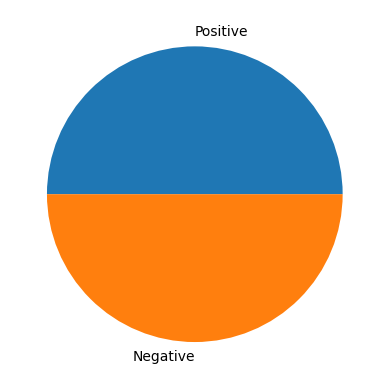

In [86]:
## balance
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [87]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [88]:
y_train_smote

0       0
1       1
2       0
3       0
4       0
       ..
9429    1
9430    1
9431    1
9432    1
9433    1
Name: label, Length: 9434, dtype: int64

In [89]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [90]:
y_test

4389    1
2154    1
1515    1
5628    0
2340    0
       ..
1210    0
3228    1
3361    0
7383    1
3008    1
Name: label, Length: 1584, dtype: int64

In [91]:
## Model Training and Evaluation

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [93]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [94]:
## Logistic Regression

In [95]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)


LogisticRegression()

In [96]:
y_train_pred = lr.predict(vectorized_x_train_smote)


In [97]:
y_train_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [98]:
y_train_smote

0       0
1       1
2       0
3       0
4       0
       ..
9429    1
9430    1
9431    1
9432    1
9433    1
Name: label, Length: 9434, dtype: int64

In [101]:
training_scores(y_train_smote, y_train_pred)


Training Scores:
	Accuracy = 0.941
	Precision = 0.917
	Recall = 0.969
	F1-Score = 0.942


In [100]:
y_test_pred

NameError: name 'y_test_pred' is not defined

In [102]:
y_test_pred = lr.predict(vectorized_x_test)

In [103]:
y_test_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [104]:
y_test

4389    1
2154    1
1515    1
5628    0
2340    0
       ..
1210    0
3228    1
3361    0
7383    1
3008    1
Name: label, Length: 1584, dtype: int64

In [105]:
validation_scores(y_test, y_test_pred)

Testing Scores:
	Accuracy = 0.877
	Precision = 0.709
	Recall = 0.882
	F1-Score = 0.786


In [106]:
## It seems that the testing score is lower than the training score

In [108]:
## Multinomial Naive Bayes

In [109]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)
y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.904
	Precision = 0.868
	Recall = 0.953
	F1-Score = 0.909
Testing Scores:
	Accuracy = 0.866
	Precision = 0.673
	Recall = 0.931
	F1-Score = 0.781


In [110]:
## Decision Tree

In [111]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)
y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.815
	Precision = 0.641
	Recall = 0.636
	F1-Score = 0.639


In [112]:
## this time overfitting

In [113]:
## Random Forest

In [114]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)
y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.876
	Precision = 0.756
	Recall = 0.762
	F1-Score = 0.759


In [115]:
## Support Vector Machine

In [116]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)
y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.978
	Precision = 0.961
	Recall = 0.997
	F1-Score = 0.979
Testing Scores:
	Accuracy = 0.891
	Precision = 0.753
	Recall = 0.86
	F1-Score = 0.803


In [117]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)